<a href="https://colab.research.google.com/github/Imran-Github22/Programming-For-Data/blob/main/8_2_Correlation_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively
---
This worksheet has a set of exercises for practising using the linregress function.  The function will run a linear regression algorithm (or model) to produce data that can be used for predictions.

### Exercise 1 - Clean the data 
---
Using the positive psychology dataset - "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
* Read the data and display info 
* Visually check the summary to see which columns have null values
* Remove columns with a significant number of null values

**Expected Output**
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          44 non-null     int64  
 1   English      44 non-null     object 
 2   sex          44 non-null     object 
 3   origin       44 non-null     object 
 4   Ukresidence  44 non-null     float64
 5   MAAS         44 non-null     float64
 6   Resilliance  44 non-null     int64  
 7   Wellbeing    44 non-null     int64  
 8   Stress       44 non-null     int64  
 9   selfesteem   44 non-null     int64  
 10  LoC          44 non-null     int64  
 11  sleep        44 non-null     int64  
 12  Year         44 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.6+ KB
```

In [1]:
from numpy.lib.function_base import disp
from scipy.stats import linregress
url = 'https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true'

def create_dataframe(url, db_type='csv', sheetname=None):
  import pandas as pd
  if db_type == 'csv':
    df = pd.read_csv(url)
  elif db_type == 'excel':
    if sheetname == None:
      df = pd.read_excel(url)
    else:
      df = pd.read_excel(url, sheet_name=sheetname)
  else:
    df = pd.read_csv(url)
  return df

# Create the DataFrame
psyc_df = create_dataframe(url)
# Display info of the original DataFrame
display(psyc_df.info())
# Drop the column that has the most Nulls
psyc_df = psyc_df.drop(columns=['firstlanguage'])

print('')
print('Cleaned DataFrame:')
display(psyc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB


None


Cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          44 non-null     int64  
 1   English      44 non-null     object 
 2   sex          44 non-null     object 
 3   origin       44 non-null     object 
 4   Ukresidence  44 non-null     float64
 5   MAAS         44 non-null     float64
 6   Resilliance  44 non-null     int64  
 7   Wellbeing    44 non-null     int64  
 8   Stress       44 non-null     int64  
 9   selfesteem   44 non-null     int64  
 10  LoC          44 non-null     int64  
 11  sleep        44 non-null     int64  
 12  Year         44 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.6+ KB


None

### Exercise 2 - Check for outliers 
---
We briefly mentioned outliers in the R and stats presentation. An outlier is an abnormal value in the data that is either extremely high or low compared to the rest of the data. Outliers can skew results. 

A value is considered to be an outlier if it is any of:
*  greater than `Q3 + 1.5 * interquartile_range`
*  less than `Q1 - 1.5 * interquartile_range`
*  more than 2 standard deviations from the mean

Q3 = value at 75% of data, Q1 = value at 25% of the data, IQR is the interquartile range, the difference between Q3 and Q1.  

We can check for outliers using a Box plot, in which:

*  the upper line on the boxplots arm (whisker) is `Q3 + 1.5 * IQR`
*  the lower line on the boxplots arm (whisker) is `Q1 - 1.5 * IQR`
*  the middle line of the box is the median
*  the top of the box is Q3
*  the bottom of the box is Q1
*  outliers are shown as circles or dots, either above or below the whiskers

1. Using either matplotlib or Seaborn, create a boxplot of `Wellbeing` and a separate boxplot of `selfesteem`
2. use `plt.show()` to separate the graphs 
3. Can you see any outliers? Are they high or low?

**Expected Output**

https://docs.google.com/presentation/d/e/2PACX-1vQBji5MrvtdeXCtP2PJzhPLKqXXuLMYjy4nCIzXpJLoye38IzetN5amZd6pU9e4io3bTUvE6Slg_hIk/pub?start=false&loop=false&delayms=3000


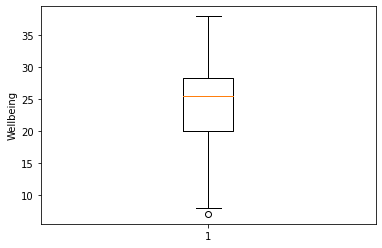

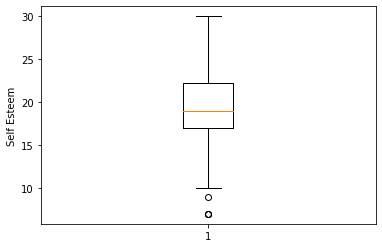

In [2]:
# Draw the plot
def show_boxplot(x, xlabel=None, ylabel=None):
  import matplotlib.pyplot as plt  
  # Draw the Boxplot
  plt.boxplot(x=x)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

# Create the variables
w = psyc_df['Wellbeing']
s = psyc_df['selfesteem']

# Show the boxplot
show_boxplot(w, '', 'Wellbeing')
show_boxplot(s, '' , 'Self Esteem')

### Exercise 3 - Removing outliers
---
Create a function called `remove_outliers(df, column)` to remove outliers from a given column in a given dataframe.  Use the function to remove outliers from the `Wellbeing` column.  Then use the function to remove the outliers from the `selfesteem` columns. 

The function will:

1. Store the values for Q1 and Q3 in 2 separate variables   *Hint: you can use `.quantile(0.75)` and `.quantile(0.25)` to get Q3 and Q1 respectively*  
2. Calculate the interquartile range(IQR) using `Q3` - `Q1`  
3. Create a variable which will store the value for the `upper_limit` (`Q3 + 1.5 * IQR`)  
4. Create another variable which assigns the value for the `lower_limit` (`Q1  - 1.5 * IQR`)  
5. Filter all rows where values are NOT outliers into a new dataframe called `df_normal`
6. Return `df_normal`

Run the function twice, once for each column.
Show the info for the resulting dataframe

**Test output**:  
```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          41 non-null     int64  
 1   English      41 non-null     object 
 2   sex          41 non-null     object 
 3   origin       41 non-null     object 
 4   Ukresidence  41 non-null     float64
 5   MAAS         41 non-null     float64
 6   Resilliance  41 non-null     int64  
 7   Wellbeing    41 non-null     int64  
 8   Stress       41 non-null     int64  
 9   selfesteem   41 non-null     int64  
 10  LoC          41 non-null     int64  
 11  sleep        41 non-null     int64  
 12  Year         41 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.5+ KB
```


1 outliers found and eliminated from the 'Wellbeing' column
2 outliers found and eliminated from the 'Wellbeing' column
1 outliers found and eliminated from the 'Wellbeing' column
0 outliers found and eliminated from the 'Wellbeing' column
1 outliers found and eliminated from the 'selfesteem' column
0 outliers found and eliminated from the 'selfesteem' column
1 outliers found and eliminated from the 'Wellbeing' column
0 outliers found and eliminated from the 'Wellbeing' column
0 outliers found and eliminated from the 'selfesteem' column
0 outliers found and eliminated from the 'Wellbeing' column
0 outliers found and eliminated from the 'selfesteem' column
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 42
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          38 non-null     int64  
 1   English      38 non-null     object 
 2   sex          38 non-null     object 
 3   origin       38 no

None

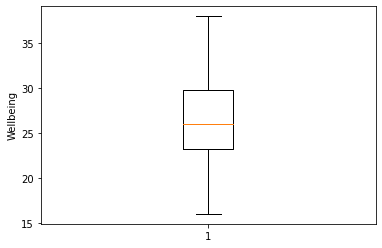

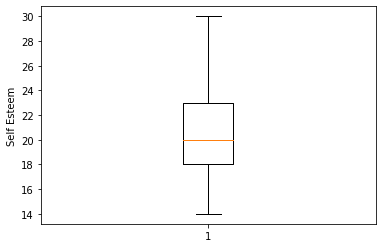

In [3]:
def remove_outliers(df, column):
  # Get the quantiles Q1 and Q3
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  # Calculate the interquartile range IQR = (Q3 - Q1)
  IQR = Q3 - Q1
  # Calculate the lower and upper limits 
  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR
  # Filter all the rows for the column below the lower_limit
  df_t = df[df[column] >= lower_limit]
  # Filter all the rows for the column above the upper_limit
  df_normal = df_t[df_t[column] <= upper_limit]
  return df_normal

def show_cleanup_stats(df, column):
  # Remove any Outliers from the column
  df_rec_nums = len(df)
  df_normal = remove_outliers(df, column)
  normal_df_rec_nums = len(df_normal)
  num_outliers = df_rec_nums - normal_df_rec_nums
  print(f"{num_outliers} outliers found and eliminated from the '{column}' column")
  return df_normal, num_outliers

# Recursively check the column for any outliers
def get_recurs_clean(df, column, ol=1):
  if ol <= 0:
    return df
  df_normal, oln = show_cleanup_stats(df, column)
  return get_recurs_clean(df=df_normal, column=column, ol=oln) 

# Further clean the DataFrame through pass filtering
def get_pass_filtering(df, column_a, column_b):
  # Through the first pass filtering
  df_normal = get_recurs_clean(df, column_a)
  df_normal = get_recurs_clean(df_normal, column_b)
  # Through the second pass filtering
  i = 0
  while i <=1:  
    df_normal = get_recurs_clean(df_normal, column_a)
    df_normal = get_recurs_clean(df_normal, column_b)
    i+=1
  return df_normal

df_normal = get_pass_filtering(psyc_df, 'Wellbeing', 'selfesteem')
display(df_normal.info())

# Create the variables
w = df_normal['Wellbeing']
s = df_normal['selfesteem']

# Show the boxplot
show_boxplot(w, '', 'Wellbeing')
show_boxplot(s, '' , 'Self Esteem')

### Exercise 4 - Checking for normality
---

Linear regressions assume that the data is normally distributed (Gaussian) and therefore has the bell curved shape and a similar mean and median (this would be true if the mean was centred like it is in Gaussian data). 

1. Use Seaborn's **distplot** to check the shape of the `Wellbeing` and `selfesteem` columns.  Do they look normally distributed (Gaussian)?

`sns.distplot(dataframe['column'])`

*Hint: if you add, `bins= ...` as a parameter, you can set the number of bins (bars) in your chart*

2. Compare the mean and median of `Wellbeing` - are they similar? 
3. Compare the mean and median of `selfesteem` - are they similar?





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


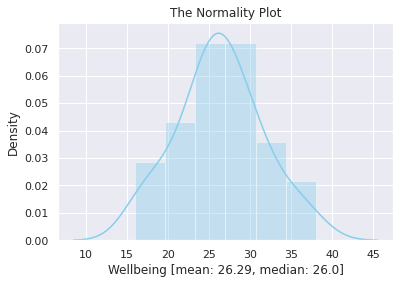

In [33]:
from seaborn.palettes import color_palette
def show_distplot(df, column, color='skyblue'):
  import seaborn as sns
  mean_v = round(df[column].mean(),2)
  median_v = round(df[column].median(), 2)
  xlabel = column + f' [mean: {mean_v}, median: {median_v}]'
  sns.set_theme(style="darkgrid")
  #chart = sns.displot(df, binwidth=3, height=5)
  chart = sns.distplot(df[column], axlabel=xlabel, color=color)
  chart.set_title('The Normality Plot')

well_esteem_df = df_normal[['Wellbeing', 'selfesteem']]
show_distplot(well_esteem_df, 'Wellbeing')

The mean and median of 'Wellbeing' are almost similar with a difference of only 0.29.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


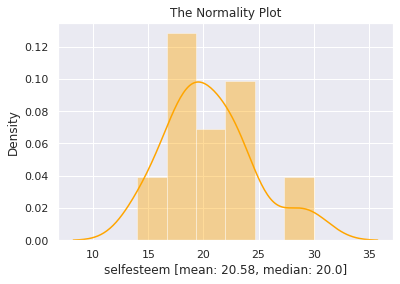

In [34]:

show_distplot(df_normal, 'selfesteem', 'orange')

Although they are almost similar but, the mean and median, have slightly higher difference of 0.58 between them for the 'selfesteem' variable than the 0.29 difference they have for the 'Wellbeing' variable.

### Exercise 5 - Check which variables are most highly correlated
---
Using the `dataframe.corr()` function and Seaborn's heatmap, create a correlation heatmap matrix to check which variables are most highly correlated.

A correlation matrix finds the correlation coefficient between every variable pair combination in a set of variables.  A correlation heatmap shows the degree of correlation between variables using a colour scale.

*The matrix and heatmap will always show the correlation coefficients between each variable and itself, which will have a correlation coefficient of 1.*
  
Values closest to 1 mean the variables are positively correlated with each other with 1 meaning 100% correlated


Values close to -1 mean the variables are negatively correlated with each other with -1 meaning 100% negatively correlated

1. create the correlation matrix assigning it to a variable called **correlation_matrix** using the .corr() function and rounding to 2 decimal places:

  `correlation_matrix = dataframe.corr().round(2)`

*This will create a matrix similar to the linear regression matrix created in the numpy worksheet, but with more than two variables.*

2. create a heatmap of the correlation matrix using:

 `sns.heatmap(data=data_variable, annot=True)`

*Hint: Use `annot = True` to print the correlation values inside the square*

3. Which variables are the most highly correlated with each other (closest to 1 or -1)?

In [6]:
# Create and show the correlation martrix
def show_correlation_matrix(df):
  corr_matrix = df.corr().round(2)
  return corr_matrix

correlation_matrix = show_correlation_matrix(df_normal)
display(correlation_matrix)

,Age,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
Age,1.00,0.15,0.18,0.09,0.02,0.15,-0.07,0.32,-0.13,NaN
Ukresidence,0.15,1.00,0.17,0.11,0.14,-0.15,-0.05,-0.20,0.30,NaN
MAAS,0.18,0.17,1.00,0.39,0.02,-0.16,0.16,-0.26,0.38,NaN
Resilliance,0.09,0.11,0.39,1.00,0.38,-0.46,0.45,-0.46,0.20,NaN
Wellbeing,0.02,0.14,0.02,0.38,1.00,-0.59,0.54,-0.21,0.29,NaN
Stress,0.15,-0.15,-0.16,-0.46,-0.59,1.00,-0.65,0.36,-0.30,NaN
selfesteem,-0.07,-0.05,0.16,0.45,0.54,-0.65,1.00,-0.41,0.22,NaN
LoC,0.32,-0.20,-0.26,-0.46,-0.21,0.36,-0.41,1.00,-0.24,NaN
sleep,-0.13,0.30,0.38,0.20,0.29,-0.30,0.22,-0.24,1.00,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


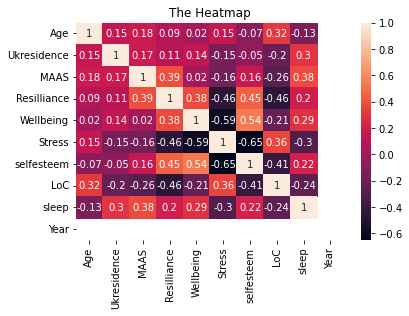

In [7]:
# Create and show the heatmap
def show_heatmap(df):
  import seaborn as sns
  chart = sns.heatmap (data=correlation_matrix, annot=True)
  chart.set_title('The Heatmap')

show_heatmap(df_normal)

The 'Strees' and the 'selfesteem' are the two most higly correlated variables with a negative correlation figure of -0.65.

### Exercise 6 - Linear regression 
---
Using the `linregress` function, perform a linear regression on the Wellbeing and selfesteem columns   
To do this:

1. `from scipy.stats import linregress`
2. create a variable 'x' which stores the Wellbeing column
3. create a variable 'y' which stores the selfesteem column
4. create a variable called regression and assign the result of running the linregress function with x, y as its parameters ( linregress(x,y) )
5. display the regression
6. display the slope (regression.slope)
7. display the y-intercept
8. display the r^2 value (rvalue**2)
9. display the pvalue 


In [8]:
def get_regression(x, y):
  from scipy.stats import linregress
  # Calculate regression for the variables
  regression = linregress(x,y)
  # Get slope value
  slope = regression.slope
  # Get intercept value
  intercept = regression.intercept
  # Get r value
  r_value = regression.rvalue
  # Get p value
  p_value = regression.pvalue
  # Return and display the values
  return regression, slope, intercept, r_value, p_value

def show_regression(x, y):
  # Show regression
  regression, slope, intercept, r_value, p_value =  get_regression(x, y)
  display(regression)
  print('')
  print(f'slope:        {round(slope, 2)}')
  print(f'intercept:    {round(intercept, 2)}')
  print(f'r value:      {round(r_value, 2)}')
  r_sqr = r_value * r_value
  print(f'r^2 value:    {round(r_sqr, 2)}')
  print(f'p value:      {p_value}')

# Create x, y variables
x = df_normal['selfesteem']
y = df_normal['Wellbeing']
show_regression(x, y)

LinregressResult(slope=0.7022711142654365, intercept=11.837473385379703, rvalue=0.5404239144691151, pvalue=0.0004608825728611857, stderr=0.18222914316575428)


slope:        0.7
intercept:    11.84
r value:      0.54
r^2 value:    0.29
p value:      0.0004608825728611857


### Exercise 7 - understanding the output 
---
The r^2 value (rvalue**2) helps us understand how much our independent variable (x) is predicting our dependent variable (y). The closer to 1 the rvalue is the more  the change in Y is explained by X. So an rvalue of 0.7 means that 70% of Y's variance can be explained by X. 

Our pvalue shows how significant our model is, if the pvalue is < 0.05 then the model is significant. 

On this basis, write below the findings of the above regression.
* is the model significant?
* how much is the change in y explained by x? 

**Write about the findings here**: 

### Exercise 8 - Linear regression with other variables 
---

Referring back to the correlation heatmap..  
*  Repeat Exercise 6 but with the variables that were the most highly correlated according to the heatmap.   
* write a comment comparing the results of this regression with the one you created in exercise 6

In [9]:
# Create x, y variables
x = df_normal['Stress']
y = df_normal['selfesteem']
show_regression(x, y)

LinregressResult(slope=-0.34911734164070585, intercept=27.653167185877457, rvalue=-0.6453778726515037, pvalue=1.2153933598082418e-05, stderr=0.06886869318001401)


slope:        -0.35
intercept:    27.65
r value:      -0.65
r^2 value:    0.42
p value:      1.2153933598082418e-05


**Comment here**: The 'Stress' and 'selfesteem' variables have higher / stronger correlation between them with a negative correlation figure of round -0.65 meaning that 65% of DV's variance can be explained by IV. Since the pvalue of 1.22^-5 < 0.05 that shows our model is statistical significant.

### Exercise 9 - Plotting a line of best fit 
---
To create a line of best fit we use y = slope\*x + intercept. 

Using matplotlib (dont forget to import it):

* create a scatter graph between Wellbeing and selfesteem 
* plot a line of best fit using the results in exercise 6  (y = slope * x + intercept)  

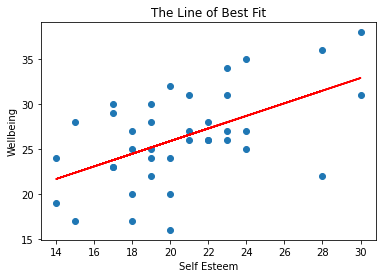

In [10]:
# Draw the plot
def show_corr_scatterplot(x, y, slope, intercept, xlabel=None, ylabel=None):
  import matplotlib.pyplot as plt  
  # Draw the scatter graph
  plt.scatter(x,y)
  plt.title('The Line of Best Fit')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  # Draw the regression line and show the graph
  y = slope*x + intercept
  plt.plot(x, y, color='red')
  plt.show()

# Create x, y variables
x = df_normal['selfesteem']
y = df_normal['Wellbeing']

# Get regression values
regr_values, slope, intercept, r_value, p_value = get_regression(x,y)

# Display
show_corr_scatterplot(x, y, slope, intercept, 'Self Esteem', y.name)

### Exercise 10 - using Seaborn to plot a regression line 
---

Use Seaborn's `regplot` function to create a scatter graph with line of best fit of the variables you used in Exercise 8.

* Compare the 'Wellbeing' and 'selfesteem' graph to the graph you created in Exercise 9

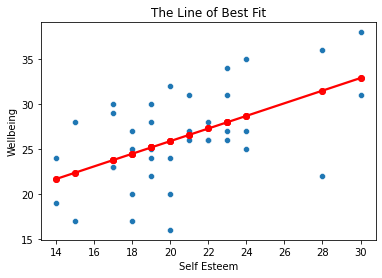

In [11]:
def show_sn_corr_scatterplot(x, y, slope, intercept, xlabel=None, ylabel=None):
  import seaborn as sns
  # Draw the scatter plot
  chart = sns.scatterplot(x=x,y=y)
  # Plot and show regression
  chart = sns.regplot(x=x, y=(slope*x + intercept), color='red')
  chart.set_title('The Line of Best Fit')
  chart.set_xlabel(xlabel)
  chart.set_ylabel(ylabel)

# Create x, y variables
x = df_normal['selfesteem']
y = df_normal['Wellbeing']

# Get regression values
regr_values, slope, intercept, r_value, p_value = get_regression(x,y)

# Display
show_sn_corr_scatterplot(x, y, slope, intercept, 'Self Esteem', y.name)

Both graphs show the line of best fit on a scatter graph but the Seaborn version highlights the data points that lie exactly on the best fit line.